In [1]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256)


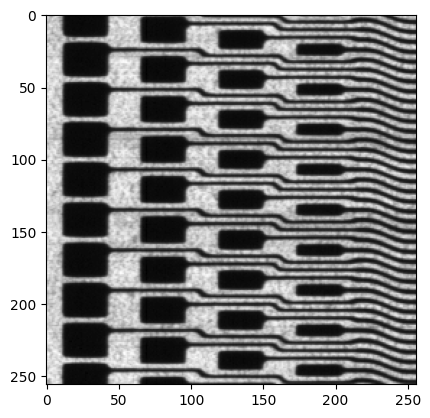

In [5]:
img = cv2.imread('/content/gdrive/MyDrive/디영처/Copy of circuit.bmp')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg,cmap='gray')

In [6]:
N = 30

dimh = np.int32(gimg.shape[0]/N)
dimw = np.int32(gimg.shape[1]/N)

dh_rest = np.int32(gimg.shape[0]%N)
dw_rest = np.int32(gimg.shape[1]%N)

meanimg = np.zeros((N,N))
outimg = np.zeros((gimg.shape[0], gimg.shape[1]))

In [7]:
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  avg = 0

  for y in range(h, h+dimh):
    for x in range(w, w+dimw):
      sum = sum + img[y, x]
      count = count + 1


  avg = np.int32(sum/count)
  return avg

In [8]:
for h in range(0, gimg.shape[0]-dh_rest, dimh):
  for w in range(0, gimg.shape[1]-dw_rest, dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] =mean_function(gimg, dimh, dimw, h, w)

(30, 30)


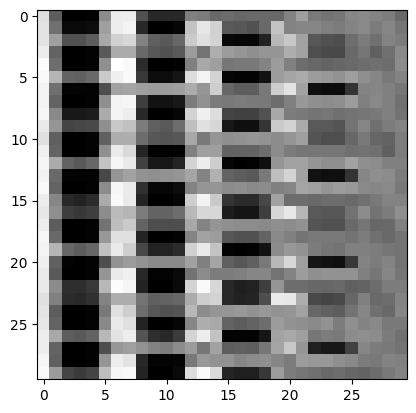

In [9]:
# cv2_imshow(meaning)
plt.imshow(meanimg, cmap='gray')
print(meanimg.shape)

In [10]:
for h in range(0, gimg.shape[0]-dh_rest):
  for w in range(0, gimg.shape[1]-dw_rest):
    if(gimg[h, w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
      outimg[h,w] = 255
    else:
      outimg[h,w] = 0

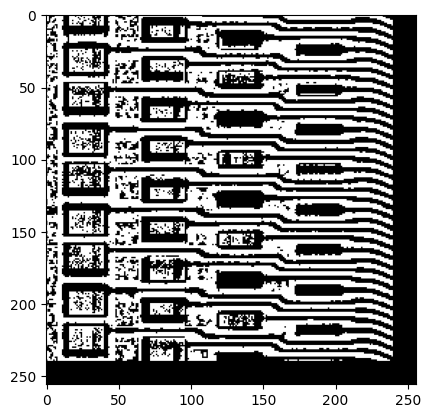

In [11]:
plt.imshow(outimg, cmap = 'gray')